# DeepSea Classifier: A Custom CNN for Fish Species Recognition

# Summary:
Objective:

To design and implement a deep learning model capable of accurately classifying fish species from images, enabling applications in marine biodiversity monitoring, fisheries management, and ecological studies.

Overview:

This project presents a custom-built Convolutional Neural Network (CNN) — FishCNN — designed to classify fish images into multiple categories. The model was trained on a curated dataset using data augmentation techniques to improve generalization and robustness. The training process incorporated cross-entropy loss, Adam optimizer, and real-time validation to prevent overfitting.
The project workflow involved:

Dataset preprocessing & augmentation
Custom CNN architecture design
Model training with loss and accuracy tracking
Evaluation using confusion matrix, classification report, and test accuracy
Model saving for deployment

Key Results:

Achieved high accuracy on test data
Generated visual performance insights through confusion matrix
Developed a ready-to-deploy .pth model for real-world use

Applications:

Automated fish species identification
Marine biodiversity research
Smart fisheries management systems

# Github link: 
https://github.com/Akdas-DS/DeepSea-Classifier-A-Custom-CNN-for-Fish-Species-Recognition.git

# Streamlit app link :
https://akdas-ds-deepsea-classifier-a-custom-cnn-for-fish-sp-app-anicjm.streamlit.app/

# Importing librries:

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [2]:
# Seting up dataset directory paths 
base_dir = r"C:\Users\makda\OneDrive\Desktop\Project_3\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Defining image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Loading datasets with ImageFolder (folder name is label)
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Preparing data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Classes info
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print("Classes:", class_names)

# Dataset sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")



Number of classes: 11
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']
Train dataset size: 6225
Validation dataset size: 1092
Test dataset size: 3146


In [3]:
# creating CNN model from scratch
class FishCNN(nn.Module):
    def __init__(self, num_classes):
        super(FishCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 14 * 14, 512),  # Assuming input image size 224x224
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = FishCNN(num_classes).to(device)
print(model)


FishCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=50176, out_features=512, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Li

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [1/15] Train Loss: 1.6959 Acc: 0.4037 | Val Loss: 0.9361 Acc: 0.7033
Epoch [2/15] Train Loss: 0.8343 Acc: 0.7096 | Val Loss: 0.3699 Acc: 0.8929
Epoch [3/15] Train Loss: 0.5475 Acc: 0.8104 | Val Loss: 0.3518 Acc: 0.9212
Epoch [4/15] Train Loss: 0.3871 Acc: 0.8684 | Val Loss: 0.2015 Acc: 0.9359
Epoch [5/15] Train Loss: 0.2759 Acc: 0.9100 | Val Loss: 0.1590 Acc: 0.9625
Epoch [6/15] Train Loss: 0.2984 Acc: 0.9052 | Val Loss: 0.1582 Acc: 0.9661
Epoch [7/15] Train Loss: 0.1878 Acc: 0.9386 | Val Loss: 0.1236 Acc: 0.9652
Epoch [8/15] Train Loss: 0.1912 Acc: 0.9357 | Val Loss: 0.0958 Acc: 0.9771
Epoch [9/15] Train Loss: 0.1563 Acc: 0.9496 | Val Loss: 0.0805 Acc: 0.9780
Epoch [10/15] Train Loss: 0.1373 Acc: 0.9592 | Val Loss: 0.0942 Acc: 0.9789
Epoch [11/15] Train Loss: 0.1509 Acc: 0.9528 | Val Loss: 0.2665 Acc: 0.9212
Epoch [12/15] Train Loss: 0.1403 Acc: 0.9569 | Val Loss: 0.1016 Acc: 0.9716
Epoch [13/15] Train Loss: 0.1133 Acc: 0.9631 | Val Loss: 0.1006 Acc: 0.9844
Epoch [14/15] Train L

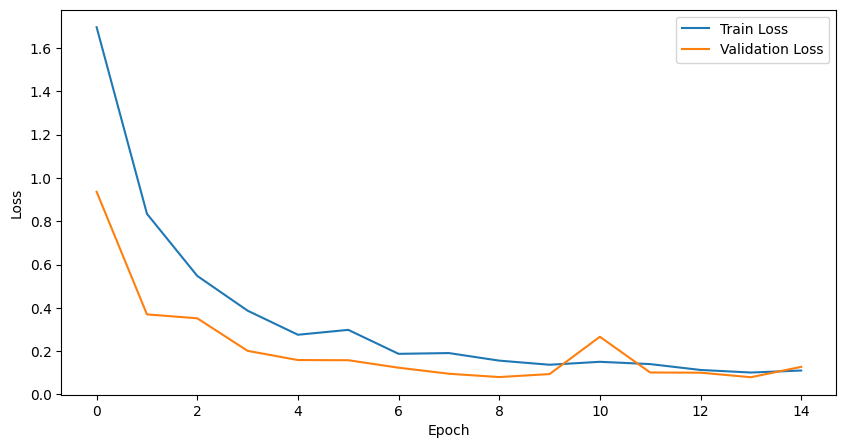

Best Validation Accuracy: 0.9863


In [5]:
# training the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15):
    train_losses, val_losses = [], []
    best_val_acc = 0.0
    best_model_wts = None

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = model.state_dict()

    # Load best model weights
    if best_model_wts:
        model.load_state_dict(best_model_wts)

    # Plot losses
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
    return model

# Train the model
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15)


Test Accuracy: 0.9816


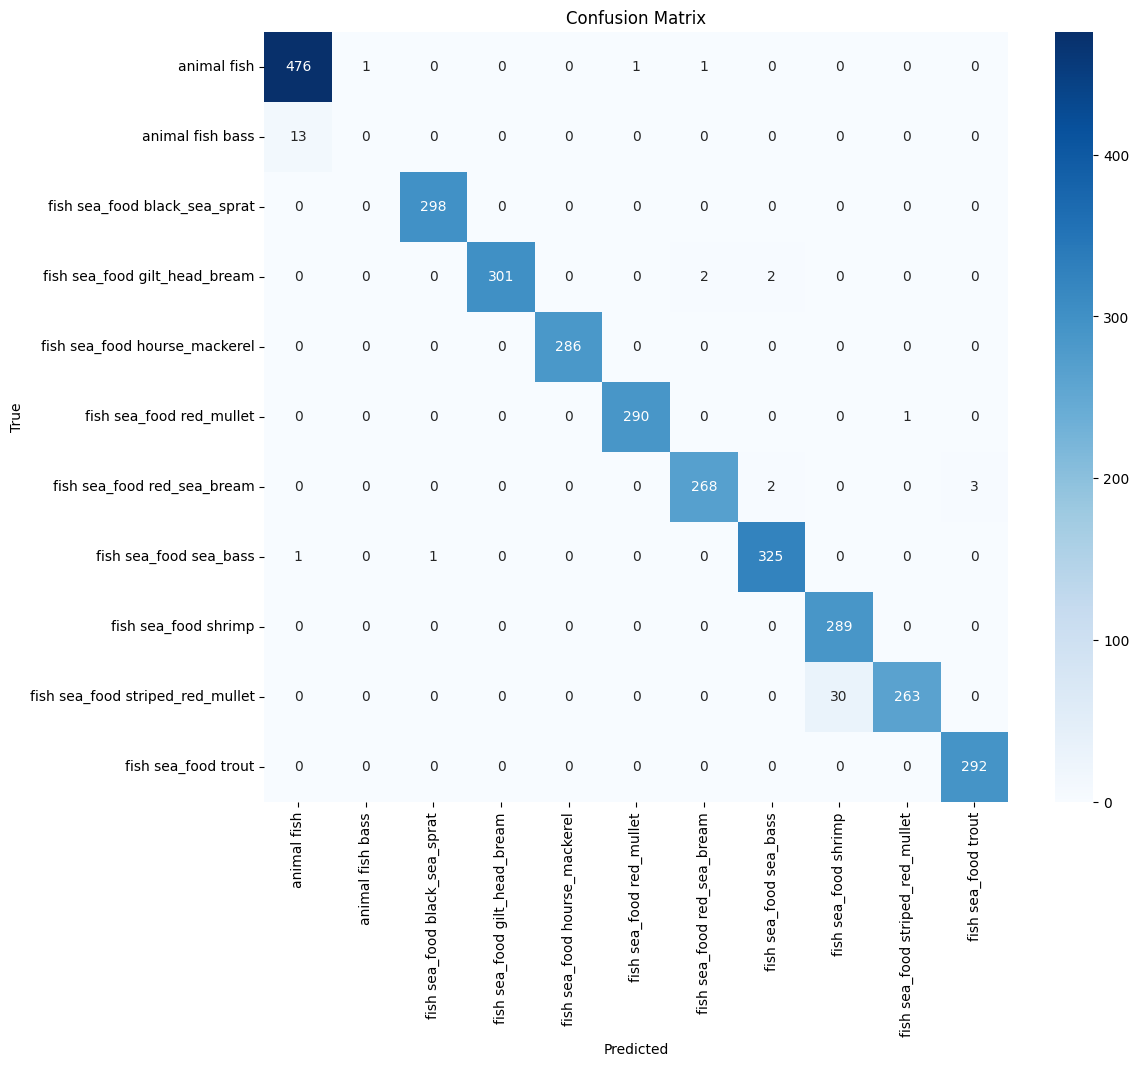

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       479
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.99      0.98      0.99       273
          fish sea_food sea_bass       0.99      0.99      0.99       327
            fish sea_food shrimp       0.91      1.00      0.95       289
fish sea_food striped_red_mullet       1.00      0.90      0.94       293
             fish sea_food trout       0.99      1.00      0.99       292

                        accuracy                           0.98      3146
             

In [6]:
def evaluate_model(model, test_loader, class_names):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.numpy())
            y_pred.extend(preds.cpu().numpy())

    # Accuracy
    accuracy = np.mean(np.array(y_pred) == np.array(y_true))
    print(f"Test Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

evaluate_model(trained_model, test_loader, class_names)


In [7]:
#saving the model
model_save_path = "fish_cnn_model.pth"
torch.save(trained_model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to fish_cnn_model.pth


In [8]:
# Saving  the trained weights
torch.save(model.state_dict(), r"C:\Users\makda\OneDrive\Desktop\Project_3\fish_cnn_model.pth")
print("Model saved successfully!")


Model saved successfully!
